# DataBase

In [1]:
import os
import pandas as pd
import sqlite3

%matplotlib inline

In [5]:
data_iris_folder_content = os.listdir('./data/iris/')

In [7]:
error_mesg ="Error: file not available."
assert "database.sqlite" in data_iris_folder_content, error_mesg

In [8]:
conn = sqlite3.connect('./data/iris/database.sqlite')
cursor = conn.cursor()

In [9]:
type(cursor)

sqlite3.Cursor

In [10]:
for row in cursor.execute("SELECT name from sqlite_master"):
    print(row)

('Iris',)


In [11]:
cursor.execute("SELECT name from sqlite_master").fetchall()

[('Iris',)]

In [12]:
sample_data = cursor.execute("SELECT * from Iris LIMIT 20").fetchall()
print(type(sample_data))

<class 'list'>


In [13]:
sample_data

[(1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa'),
 (2, 4.9, 3, 1.4, 0.2, 'Iris-setosa'),
 (3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa'),
 (4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa'),
 (5, 5, 3.6, 1.4, 0.2, 'Iris-setosa'),
 (6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa'),
 (7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa'),
 (8, 5, 3.4, 1.5, 0.2, 'Iris-setosa'),
 (9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa'),
 (10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa'),
 (11, 5.4, 3.7, 1.5, 0.2, 'Iris-setosa'),
 (12, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa'),
 (13, 4.8, 3, 1.4, 0.1, 'Iris-setosa'),
 (14, 4.3, 3, 1.1, 0.1, 'Iris-setosa'),
 (15, 5.8, 4, 1.2, 0.2, 'Iris-setosa'),
 (16, 5.7, 4.4, 1.5, 0.4, 'Iris-setosa'),
 (17, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa'),
 (18, 5.1, 3.5, 1.4, 0.3, 'Iris-setosa'),
 (19, 5.7, 3.8, 1.7, 0.3, 'Iris-setosa'),
 (20, 5.1, 3.8, 1.5, 0.3, 'Iris-setosa')]

In [14]:
cursor.description

(('Id', None, None, None, None, None, None),
 ('SepalLengthCm', None, None, None, None, None, None),
 ('SepalWidthCm', None, None, None, None, None, None),
 ('PetalLengthCm', None, None, None, None, None, None),
 ('PetalWidthCm', None, None, None, None, None, None),
 ('Species', None, None, None, None, None, None))

In [15]:
type(cursor.description)

tuple

In [16]:
[row[0] for row in cursor.description]

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

# Import data from database to pandas

In [34]:
iris_data = pd.read_sql_query("SELECT * from Iris", conn)

In [35]:
iris_data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [19]:
iris_setosa_data = pd.read_sql_query("SELECT * from Iris where Species == 'Iris-setosa'", conn)

In [21]:
#iris_setosa_data

In [22]:
print(iris_setosa_data.shape)
print(iris_data.shape)

(50, 6)
(150, 6)


In [23]:
iris_data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


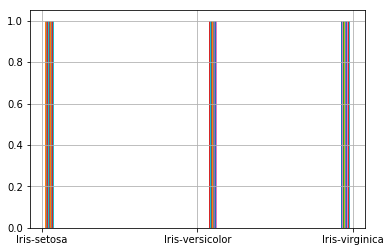

In [32]:
iris_data.Species.hist()

In [33]:
iris_data.groupby('Species').describe()

Id                                                        \
                count   mean       std    min     25%    50%     75%    max   
Species                                                                       
Iris-setosa      50.0   25.5  14.57738    1.0   13.25   25.5   37.75   50.0   
Iris-versicolor  50.0   75.5  14.57738   51.0   63.25   75.5   87.75  100.0   
Iris-virginica   50.0  125.5  14.57738  101.0  113.25  125.5  137.75  150.0   

                SepalLengthCm         ... PetalLengthCm      PetalWidthCm  \
                        count   mean  ...           75%  max        count   
Species                               ...                                   
Iris-setosa              50.0  5.006  ...         1.575  1.9         50.0   
Iris-versicolor          50.0  5.936  ...         4.600  5.1         50.0   
Iris-virginica           50.0  6.588  ...         5.875  6.9         50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 40 columns]

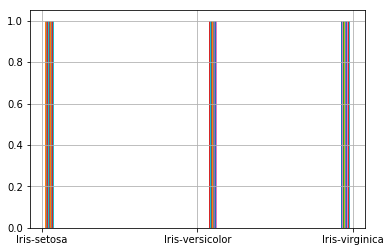

In [36]:
iris_data.Species.hist()